In [1]:
# import os module to interact with the operationg system
import os

In [2]:
# list the working directories
os.listdir()

['.ipynb_checkpoints',
 '25_AdaBoosting (1).ipynb',
 'classify_yale.ipynb',
 'process_yale_images.ipynb',
 'Tr0',
 'Tr0.zip',
 'yaleExtB_data.npy',
 'yaleExtB_target.npy']

In [3]:
# shows the present working directory
os.getcwd()

'C:\\Users\\user\\AI'

In [4]:
# sets the path of the file
path = "C:\\Users\\user\\AI"

Unzip the images:

In [5]:
os.chdir(path)  # changes the current working directory to the specified path.
dnam = '\\Tr0'  # sets the unzipped files to the variable 'dnam'
# !unzip -qA {dnam} # unzips the project file Tr0

Make a list of all images in the directory. 

In [6]:
from os import listdir # loads a library to work with directories 
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)


Number of images 1500


 Load and display 1st image using Matplotlib

(77, 68)


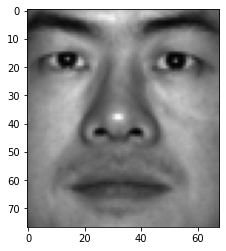

<class 'numpy.ndarray'>


In [7]:
from matplotlib import image # loads a library to work with images
from matplotlib import pyplot # loads a library to plot images
im1 = image.imread(path + dnam + '\\' + fls[0]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
pyplot.imshow(im1, cmap=pyplot.cm.gray) # displays the image
pyplot.show()
print(type(im1))

Create the data and target for training an ANN. The data will be a matrix of n=1500 rows and h*w columns, where n is the number of images, h=77 and w=68 are the height and width of an image in pixels. The target will be a nx1 matrix.

In [8]:
import numpy as np  # loads a library for working with matrixes 
m = im1.shape[0]*im1.shape[1]  # m = h*w = (77*68=5236) is the number of pixels in images
images_data = np.zeros((n, m)) # creates a nxm-matrix of the images
images_target = np.zeros((n,))  # creates a n*1 matrix of targets which are the person labels 1 to 30

# loops over all n=1500 images 
for i in range(n):
  filename = fls[i]  # loads a name of the image file
  img = image.imread(path + dnam + '\\' + filename) # loads the image name
  images_data[i] = np.ravel(img) # vectorisation of the image 
  c = int(filename[5:7])  # extracts the class label from the file name
  images_target[i] = c  # assigns the target 
  #if i % 10 == 0:
  #  print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

In [9]:
filename = fls[0]  # selects first image from the image file
filename

'yaleB02_P00A+000E+00.jpg'

In [10]:
int(filename[5:7])  # converting the sliced string value to integer i.e. '02' to 02

2

Save the data and target on Google drive as .npy files.

In [11]:
# loads a library for saving matrices
from numpy import asarray  # importing asarray function from numpy library
from numpy import save   # importing save function from numpy library
# save as a .npy file
fn = (path + '\\' + 'yaleExtB_data.npy') # creates the file name for the image data
save(fn, images_data) 
fn = (path + '\\' + 'yaleExtB_target.npy') # creates the file name for the targets
save(fn, images_target)


In [12]:
images_data

array([[ 82.,  86.,  86., ...,  91.,  85.,  80.],
       [ 96.,  99., 107., ...,  68.,  62.,  57.],
       [ 98., 104., 117., ...,  35.,  34.,  33.],
       ...,
       [  5.,   4.,   4., ...,  85.,   2.,   3.],
       [  4.,   4.,   4., ...,  82.,   1.,   0.],
       [  4.,   4.,   3., ..., 102.,   2.,   1.]])

In [13]:
images_target

array([ 2.,  2.,  2., ..., 39., 39., 39.])